<a href="https://colab.research.google.com/github/ZwwWayne/mmdetection/blob/update-colab/demo/MMDet_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMDetection Tutorial Inference



## 安装配置 MMDetection

In [1]:
# 查看环境中pytorch版本以便mmcv对应版本下载
!pip list | grep torch

torch                         1.8.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.1         
torchvision                   0.9.1+cu101   


In [2]:
# 安装mmcv-full，注意需要对应pytorch1.8和cuda10.1版本
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html
     |████████████████████████████████| 25.6MB 119kB/s 
     |████████████████████████████████| 194kB 4.3MB/s 


In [ ]:
# # 如果要安装其他版本的torch和对应的torchvision
# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# # 对应选择mmcv-full的版本
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html

# # colab上可能会存在的bug, Pillow版本问题
# !pip install Pillow==7.0.0

In [3]:
# 克隆mmdetection项目
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

# 以可编辑的模式安装mmdet
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 17187, done.
remote: Counting objects: 100% (381/381), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 17187 (delta 126), reused 176 (delta 69), pack-reused 16806
Receiving objects: 100% (17187/17187), 21.05 MiB | 21.90 MiB/s, done.
Resolving deltas: 100% (11785/11785), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=6e388a81d07349874d33c63ea5f651e68096d3caf49d53856cf7da9435776331
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables
  Running setup.py develop for mmdet


In [4]:
# 检查torch的安装以及gpu的使用
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# 检查MMDetection的安装
import mmdet
print(mmdet.__version__)

# 检查mmcv的安装
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.8.1+cu101 True
2.11.0
10.1
GCC 7.3


## Faster RCNN 模型单张图像的推理

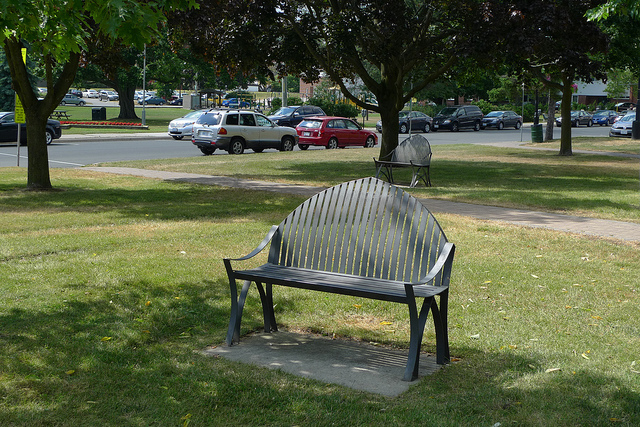

In [5]:
from PIL import Image
Image.open('demo/demo.jpg')

In [6]:
# 下载训练好的Fast-RCNN模型到checkpoints文件夹
!mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-04-23 12:09:56--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.25
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

checkpoints/faster_ 100%[===================>] 159.54M  13.5MB/s    in 11s     

2021-04-23 12:10:08 (13.9 MB/s) - ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [7]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# 根据colab状态设置device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 选择模型对应的配置文件
config = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# 选择下载好的checkpoint
checkpoint = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# 初始化模型
model = init_detector(config, checkpoint, device=device)

Use load_from_local loader


In [8]:
# 使用模型进行单张图推理
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


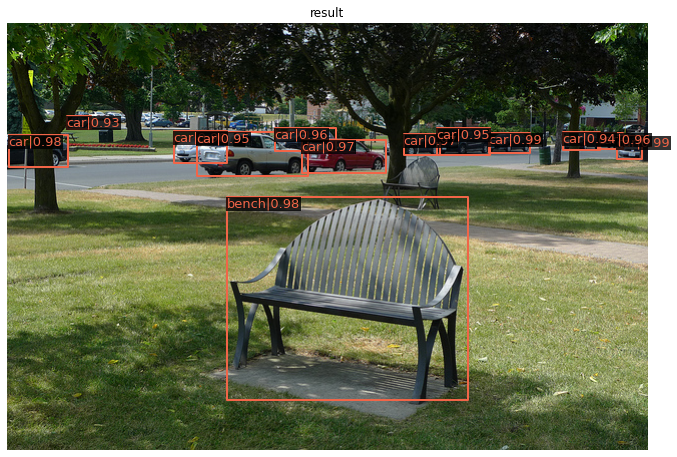

In [12]:
# 在原图上绘制结果
show_result_pyplot(model, img, result, score_thr=0.9)

### 推理结果解析

In [17]:
# 查看输出的结果
result[0]

array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
        1.35454327e-01],
       [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
        8.88783410e-02],
       [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
        7.20723346e-02]], dtype=float32)

### Faster RCNN 模型解析

In [18]:
# 查看 Fask-RCNN 模型结构
for name, module in model.named_children():
  print(name)
  [print(F'    {n}') for n,_ in  module.named_children()]

backbone
    conv1
    bn1
    relu
    maxpool
    layer1
    layer2
    layer3
    layer4
neck
    lateral_convs
    fpn_convs
rpn_head
    loss_cls
    loss_bbox
    rpn_conv
    rpn_cls
    rpn_reg
roi_head
    bbox_roi_extractor
    bbox_head


## 查看RPN模型候选框提取结果

In [19]:
# 下载训练好的RPN模型到checkpoints文件夹
!wget -c http://download.openmmlab.com/mmdetection/v2.0/rpn/rpn_r50_fpn_1x_coco/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth -O checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth

--2021-04-23 12:25:03--  http://download.openmmlab.com/mmdetection/v2.0/rpn/rpn_r50_fpn_1x_coco/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.25
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110057751 (105M) [application/octet-stream]
Saving to: ‘checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth’

checkpoints/rpn_r50 100%[===================>] 104.96M  9.18MB/s    in 11s     

2021-04-23 12:25:15 (9.21 MB/s) - ‘checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth’ saved [110057751/110057751]



In [20]:
# 类似上面的步骤，选择模型对应的配置文件，checkpoint以及模型初始化
config = 'configs/rpn/rpn_r50_fpn_1x_coco.py'
checkpoint = 'checkpoints/rpn_r50_fpn_1x_coco_20200218-5525fa2e.pth'
model = init_detector(config, checkpoint, device=device)

Use load_from_local loader


In [21]:
# 获取RPN模型输出的候选区域
img = 'demo/demo.jpg'
rpn_result = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


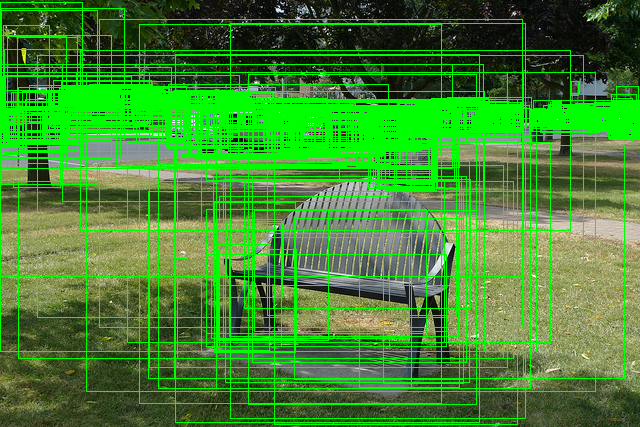

In [25]:
# colab不支持直接调用cv2.imshow，这里要用到colab提供的补丁，
import cv2
from google.colab.patches import cv2_imshow
cv2.imshow = lambda x, y: cv2_imshow(y)
cv2.getWindowProperty = lambda *args, **kwargs: 0

# 通过RPN模型的内置绘图函数将候选框绘制出来
model.show_result(img, rpn_result, top_k=1000)